## Modified by: M.Amintoosi

In [3]:
from read_and_clean_documents import *
from text_processing import *
from clustering_functions import *
from plot import *
import pandas as pd


DATA_FOLDER = "../data/"
HTML_DATA_FOLDER = "../data/gap-html/"

In [4]:
# Read from cleaned file, not htmls
(cleaned_content_as_list, cleaned_content_as_str) = \
    read_from_cleaned_file('cleaned_content.txt')
(frequent_words_removed_content_as_list, frequent_words_removed_content_as_str) = \
    read_from_cleaned_file('freq_words_removed_content.txt')
(book_names, authors) = read_authors_book_names()

(similarity_matrix, tfidf_matrix) = get_similarity_matrix(frequent_words_removed_content_as_str)

d:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


d:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
No handles with labels found to put in legend.


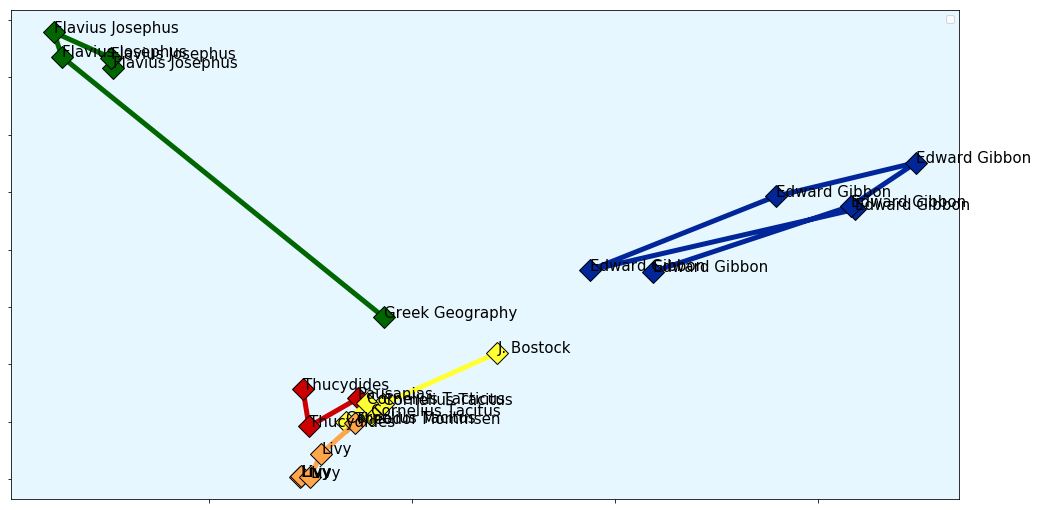

In [5]:
km_clusters = get_cluster_kmeans(tfidf_matrix, 5)  # KMeans
x_pos, y_pos = pca_reduction(similarity_matrix, 10)
scatter_clusters(x_pos, y_pos, km_clusters, authors) # Scatter K-means with PCA

d:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
No handles with labels found to put in legend.


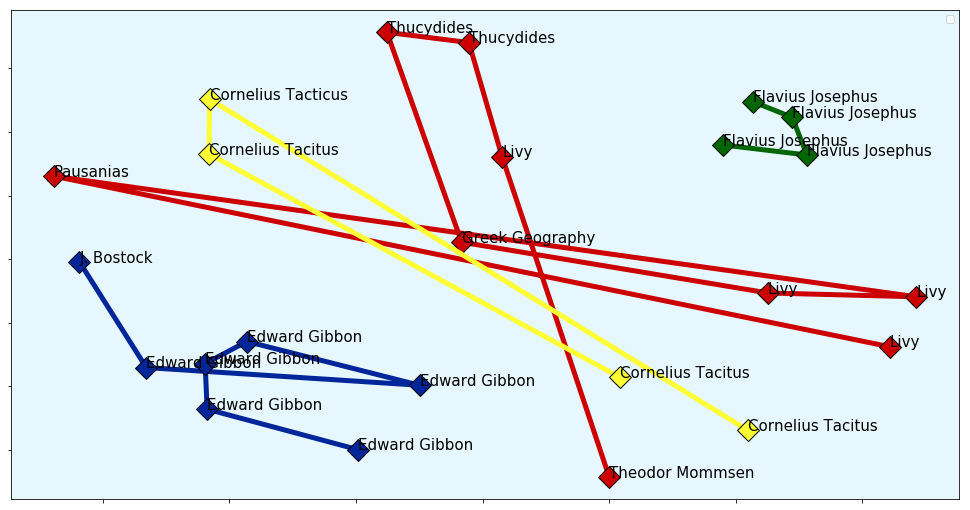

In [6]:
dbscan_clusters = get_dbscan_cluster(tfidf_matrix, 1.2)
dbscan_clusters = dbscan_clusters + 1  # DBScan clusters start from -1
x_pos, y_pos = multidim_scaling(similarity_matrix, 2)  # MultidimScaling
scatter_clusters(x_pos, y_pos, dbscan_clusters, authors) # Scatter K-means with PCA

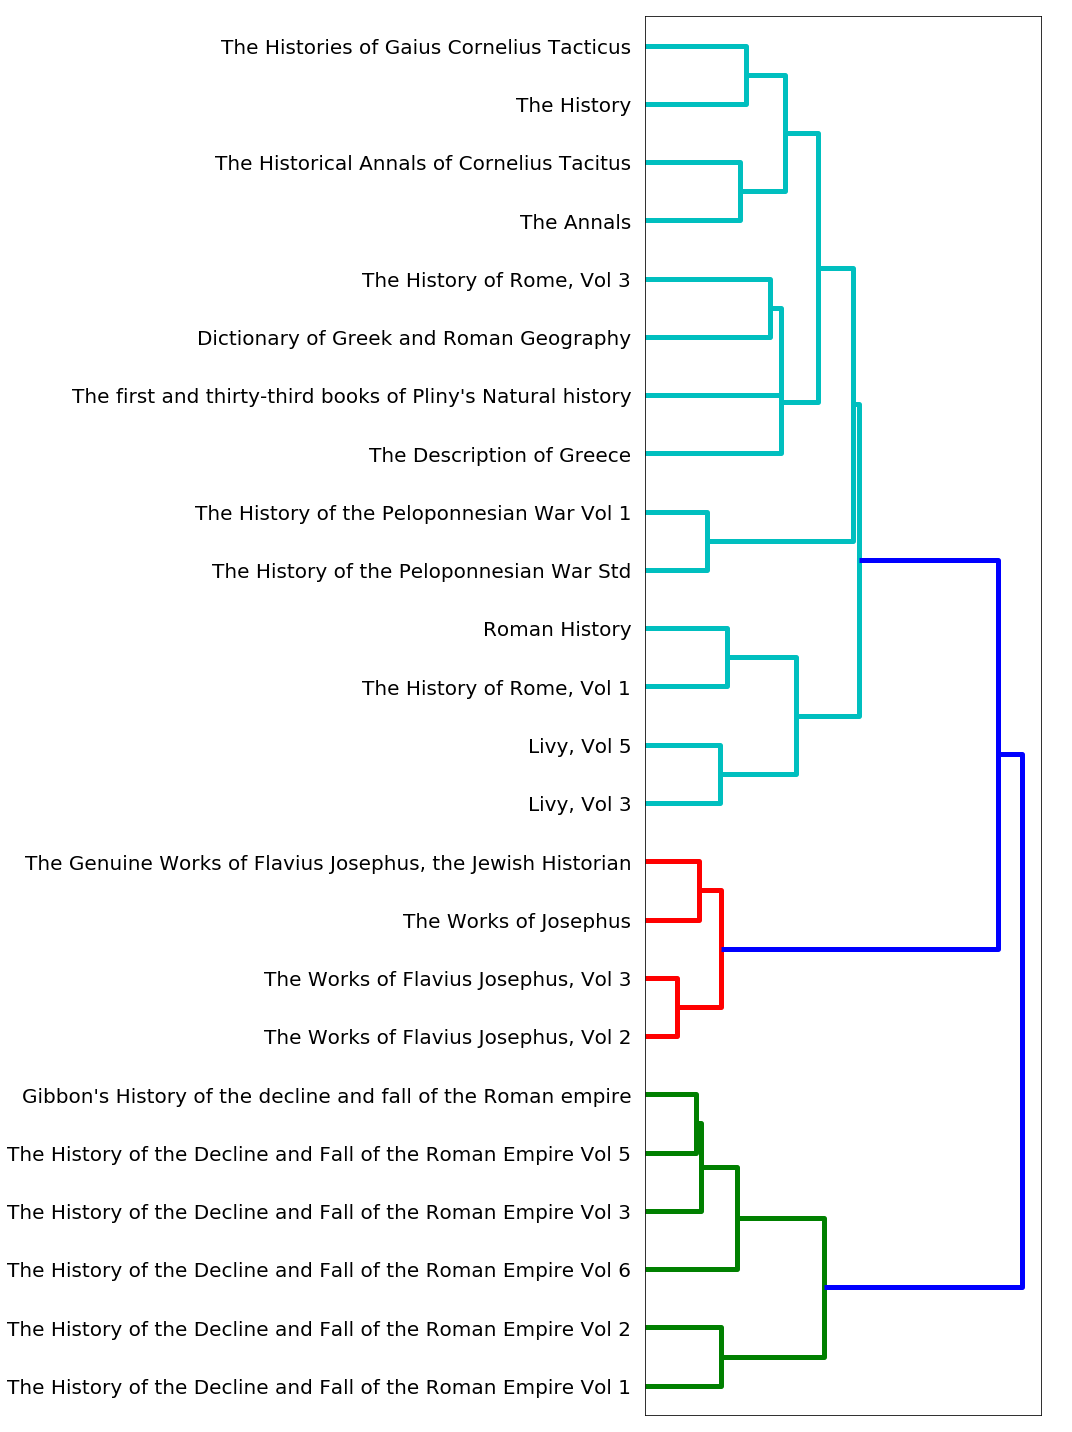

In [7]:
dendogram(similarity_matrix, book_names)

In [8]:
lda_model = lda_topic_modeling(frequent_words_removed_content_as_list, 5)
print(lda_model.print_topics(num_topics=5, num_words=5))

[(0, '0.009*"herod" + 0.007*"josephu" + 0.007*"jerusalem" + 0.004*"david" + 0.003*"hath"'), (1, '0.003*"fay" + 0.002*"liviu" + 0.002*"volsci" + 0.002*"olymp" + 0.002*"theban"'), (2, '0.006*"peloponnesian" + 0.004*"fuch" + 0.003*"fenat" + 0.003*"fhould" + 0.003*"againft"'), (3, '0.004*"galba" + 0.003*"otho" + 0.003*"vitelliu" + 0.003*"non" + 0.003*"sed"'), (4, '0.004*"strab" + 0.003*"lib" + 0.003*"ptol" + 0.003*"site" + 0.003*"plin"')]
